In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import load_boston
boston = pd.read_csv("boston.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
data=boston

In [7]:
# Spliting target variable and independent variables
X = data.drop(['MEDV'], axis = 1)
y = data['MEDV']

In [8]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [9]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

In [10]:
# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
# Value of y intercept
lm.intercept_

36.35704137659532

In [12]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.055678
2,INDUS,-0.008834
3,CHAS,4.693448
4,NOX,-14.435783
5,RM,3.28008
6,AGE,-0.003448
7,DIS,-1.552144
8,RAD,0.32625
9,TAX,-0.014067


In [13]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [14]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.073688703469035
RMSE: 4.367343437774162


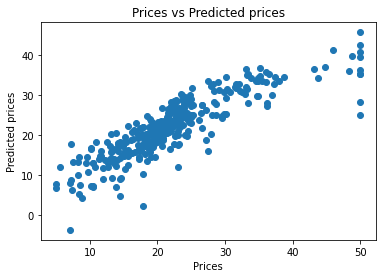

In [15]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

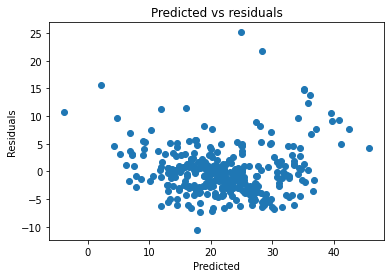

In [16]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

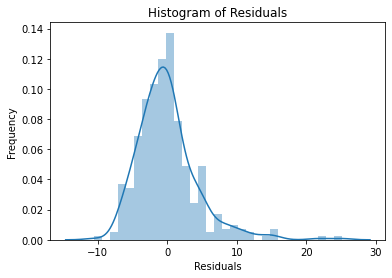

In [17]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [19]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.712181837740919
Adjusted R^2: 0.6850685326005708
MAE: 3.8590055923707443
MSE: 30.053993307124177
RMSE: 5.482152251362979


AttributeError: 'DataFrame' object has no attribute 'data'

In [21]:
#USING DEEP LEARNING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [22]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.05, verbose = 1)

Epoch 1/10
11/11 [==============================] - 1s 27ms/step - loss: 584.0454 - mae: 22.3286 - val_loss: 600.5563 - val_mae: 22.5712
Epoch 2/10
11/11 [==============================] - 0s 9ms/step - loss: 543.7456 - mae: 21.3766 - val_loss: 550.8120 - val_mae: 21.4054
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 485.3287 - mae: 19.8902 - val_loss: 474.5204 - val_mae: 19.4739
Epoch 4/10
11/11 [==============================] - 0s 7ms/step - loss: 397.9261 - mae: 17.4271 - val_loss: 365.8964 - val_mae: 16.2932
Epoch 5/10
11/11 [==============================] - 0s 8ms/step - loss: 282.7641 - mae: 13.9202 - val_loss: 240.1861 - val_mae: 11.9359
Epoch 6/10
11/11 [==============================] - 0s 8ms/step - loss: 176.9091 - mae: 10.3735 - val_loss: 149.0172 - val_mae: 8.5052
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 127.8784 - mae: 8.7038 - val_loss: 124.7760 - val_mae: 8.1702
Epoch 8/10
11/11 [==============================] 

In [25]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 3ms/step - loss: 72.8300 - mae: 6.2536
Mean squared error on test data:  72.83001708984375
Mean absolute error on test data:  6.2535552978515625


In [26]:
pred = model.predict(X_test)
print(pred)

5/5 [==============================] - 0s 3ms/step
[[15.705958]
 [20.446993]
 [21.399492]
 [20.238745]
 [24.901758]
 [27.86521 ]
 [21.05924 ]
 [17.80024 ]
 [25.3405  ]
 [24.3216  ]
 [22.818195]
 [21.58515 ]
 [20.360538]
 [22.80794 ]
 [19.3371  ]
 [21.80639 ]
 [19.74507 ]
 [20.760744]
 [21.039274]
 [21.68019 ]
 [20.938463]
 [24.780313]
 [19.839163]
 [24.364283]
 [26.08386 ]
 [22.22336 ]
 [21.164549]
 [22.766188]
 [20.58331 ]
 [16.24446 ]
 [21.818644]
 [21.95579 ]
 [16.226503]
 [19.83502 ]
 [20.331284]
 [20.954191]
 [20.996014]
 [23.595678]
 [21.845129]
 [21.924498]
 [21.222855]
 [22.036478]
 [21.059256]
 [25.296232]
 [22.203455]
 [22.16961 ]
 [21.340668]
 [21.124199]
 [22.882027]
 [23.664988]
 [25.075468]
 [19.744062]
 [21.738523]
 [22.771227]
 [19.655634]
 [22.211424]
 [20.220966]
 [19.625912]
 [26.046415]
 [22.593878]
 [23.536428]
 [21.605766]
 [19.490767]
 [20.528824]
 [23.238197]
 [23.257174]
 [21.348406]
 [17.449802]
 [19.3017  ]
 [21.517736]
 [21.399944]
 [21.580782]
 [22.423754]
